In [ ]:
from tensorflow import keras
import tensorflow as tf
import os
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,GlobalAveragePooling2D, Lambda, Conv2DTranspose, concatenate
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import Model
from keras.layers import BatchNormalization
import numpy as np                                            
import matplotlib.pyplot as plt
import pandas as pd
from keras import layers
from keras.preprocessing import image
import seaborn as sns
import zipfile
import shutil
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_zip= '/content/drive/MyDrive/Cleaning/Train/Ids-20230202T180207Z-001.zip'
zip_ref= zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive/Cleaning/Train/IDS')
local_zip= '/content/drive/MyDrive/Cleaning/Train/GroundTruth-20230202T180213Z-001.zip'
zip_ref= zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive/Cleaning/Train/GROUNDTRUTH')
zip_ref.close()

In [ ]:

Image_Width=256
Image_Height=256
Image_Size=(Image_Width,Image_Height)
Image_Channels=1


In [ ]:
train_dir = "/content/drive/MyDrive/Cleaning/Train"  
train_images_dir = os.path.join(train_dir, 'IDS')
train_labels_dir = os.path.join(train_dir, 'GROUNDTRUTH')

In [ ]:
validation_dir = "/content/drive/MyDrive/Cleaning/Test"
validation_images_dir = os.path.join(validation_dir, 'IDS')
validation_labels_dir = os.path.join(validation_dir, 'GROUNDTRUTH')

In [ ]:
# Define path to data and list of image filenames
data_path = train_dir
img_filenames = os.listdir("/content/drive/MyDrive/Cleaning/Train/IDS/Ids")
mask_filenames = os.listdir("/content/drive/MyDrive/Cleaning/Train/GROUNDTRUTH/GroundTruth")
# Load images and labels
X = []
y = []
for i,filename in enumerate(img_filenames):
    #print(filename)
    img = cv2.imread(os.path.join(train_images_dir, 'Ids',filename))
    img = cv2.resize(img, (Image_Width, Image_Height))
    img = img / 255.0
    X.append(img)
for j,filename1 in enumerate(mask_filenames):
    label = cv2.imread(os.path.join(train_labels_dir, 'GroundTruth', filename1), cv2.IMREAD_GRAYSCALE)
    label = cv2.resize(label, (Image_Width, Image_Height))
    label = np.expand_dims(label, axis=-1)
    label = cv2.threshold(label, 0, 255, cv2.THRESH_BINARY)[1]   
    y.append(np.concatenate([label, 255 - label], axis=-1))
        #  # create binary foreground/background labels


In [ ]:
from sklearn.model_selection import train_test_split                                                   
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train[0].shape

(256, 512)

In [ ]:
X_train[0].shape

(256, 256, 3)

In [ ]:
X_val[0].shape

(256, 256, 3)

In [ ]:
y_val[0].shape

(256, 512)

In [ ]:
from keras.engine.input_layer import Input

input= Input((Image_Width, Image_Height, Image_Channels))
#s= Lambda(lambda x : x/ 255)(input)
c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (input)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D((2, 2)) (c4)


c5 = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)


u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1])
c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)

output = Conv2D(2, (1, 1), activation='softmax') (c9)



In [ ]:
model_segment= Model(inputs= input, outputs= output) 

In [ ]:
model_segment.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
from keras import backend as K
from keras.losses import binary_crossentropy

def weighted_binary_crossentropy(y_true, y_pred):
    """
    Weighted binary cross-entropy loss function.
    """
    # Calculate the weights for each class
    class_weight = K.variable([0.1, 0.9]) # weight of 0.1 for background class and 0.9 for foreground class

    # Calculate the binary cross-entropy loss for each pixel
    bce = binary_crossentropy(y_true, y_pred)

    # Apply the class weights to the loss
    class_weight_bce = K.mean(class_weight * bce)

    return class_weight_bce

In [ ]:
from keras.optimizers import Adam
model_segment.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4),metrics=['accuracy'])

In [ ]:
os.mkdir("/content/TRAIN_DIR")
os.mkdir("/content/VALIDATION_DIR")



In [ ]:
import matplotlib
image_path = "/content/TRAIN_DIR/Ids"
for n1 in range(len(X_train)):
  matplotlib.image.imsave(f'{image_path}/name'+str(n1)+'.png', np.array(X_train[n1]))


In [ ]:
os.mkdir("/content/MASK_TRAIN_DIR")
os.mkdir("/content/MASK_VALIDATION_DIR")


In [ ]:
image1_path = "/content/MASK_TRAIN_DIR/Masks"
for n2 in range(len(y_train)):
  matplotlib.image.imsave(f'{image1_path}/name'+str(n2)+'.png', np.array(y_train[n2]))

In [ ]:
image2_path = "/content/VALIDATION_DIR/Ids"
for n3 in range(len(X_val)):
  matplotlib.image.imsave(f'{image2_path}/name'+str(n3)+'.png', np.array(X_val[n3]))

In [ ]:
image3_path = "/content/MASK_VALIDATION_DIR/Masks"
for n4 in range(len(y_val)):
  matplotlib.image.imsave(f'{image3_path}/name'+str(n4)+'.png', np.array(y_val[n4]))

In [ ]:
SEED= 10
np.random.seed(SEED)
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_image_generator = train_datagen.flow_from_directory("/content/TRAIN_DIR",
                                                              target_size=Image_Size,
                                                              class_mode=None,
                                                              batch_size= 8,
                                                              color_mode='grayscale',
                                                              seed=SEED)

train_mask_generator = train_datagen.flow_from_directory("/content/MASK_TRAIN_DIR",
                                                             target_size=Image_Size,
                                                             class_mode=None,  
                                                             batch_size= 8,
                                                             color_mode='grayscale',
                                                             seed=SEED)

val_datagen = ImageDataGenerator(rescale=1. / 255)
val_image_generator = val_datagen.flow_from_directory("/content/VALIDATION_DIR",
                                                          target_size=Image_Size,
                                                          class_mode=None,
                                                          batch_size= 8,
                                                          color_mode='grayscale',
                                                          seed=SEED)

val_mask_generator = val_datagen.flow_from_directory("/content/MASK_VALIDATION_DIR",
                                                         target_size=Image_Size,
                                                         class_mode=None,
                                                         batch_size=8,
                                                         color_mode='grayscale',
                                                         seed=SEED)

train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

Found 280 images belonging to 2 classes.
Found 280 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
X_train[0].shape

(256, 256, 3)

In [ ]:
y_train[0].shape

(256, 512)

In [ ]:
from keras.callbacks import TensorBoard
earlystopping= tf.keras.callbacks.EarlyStopping(patience= 5)                                 
tb = TensorBoard(log_dir='./logs/', batch_size=8, write_graph=True)


segmentation_history= model_segment.fit(train_generator,epochs= 100,verbose= 1,validation_data= val_generator, callbacks= [earlystopping, tb], steps_per_epoch= 100, validation_steps= 40)

Epoch 1/100
      4/Unknown - 258s 64s/step - loss: 0.7021 - accuracy: 0.5085

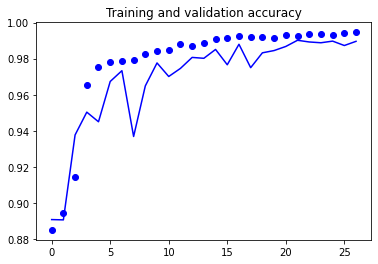

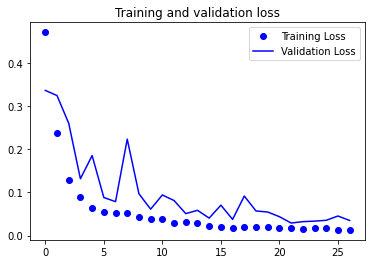

In [ ]:
import matplotlib.pyplot as plt
acc_segment = segmentation_history.history['binary_accuracy']
val_acc_segment = segmentation_history.history['val_binary_accuracy']
loss_segment = segmentation_history.history['loss']
val_loss_segment = segmentation_history.history['val_loss']

epochs_segment = range(len(acc_segment))

plt.plot(epochs_segment, acc_segment, 'bo', label='Training accuracy')
plt.plot(epochs_segment, val_acc_segment, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs_segment, loss_segment, 'bo', label='Training Loss')
plt.plot(epochs_segment, val_loss_segment, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import cv2

# Load the image
img = cv2.imread('image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the kernel for the morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))

# Apply the top hat filter
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)


In [ ]:
# Threshold the filtered image to create a binary mask
_, binary = cv2.threshold(tophat, 50, 255, cv2.THRESH_BINARY)


In [ ]:
# Find contours in the binary mask
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
